In [58]:
from util import load_file
import matplotlib.pyplot as plt
import collections
import numpy as np

In [59]:
def tokenization(string):
    #Split words
    return string.split(" ")

def count_update(label1, label2, node_id1, node_id2,distinct_label,labelHasNode,SingleWord):
    distinct_label.add(label1)
    distinct_label.add(label2)
    tokens1 = tokenization(label1)
    tokens2 = tokenization(label2)
    
    if node_id1 != "wn:":
        labelHasNode.add(label1)
            
    if node_id2 != "wn:":
        labelHasNode.add(label2)

    if len(tokens1) == 1:
        SingleWord[label1] = SingleWord.get(label1,0) + (node_id1!= "wn:")
        
    if len(tokens2) == 1:
        SingleWord[label2] = SingleWord.get(label2,0) + (node_id2!= "wn:")
        
    return distinct_label,labelHasNode,SingleWord
    

# Distinct Node Missing Probability

use dataset, **cn_predict.tsv** link:https://drive.google.com/drive/u/1/folders/115yBoiTAiIpeqry26Wuj99hqaE-6C84Z

In [60]:
head, lines = load_file("./data/cn_predict.tsv")

In [61]:
count = 0
distinct_label = set()
labelHasNode = set()
SingleWord = dict()
for line in lines:
    label1 = line[0]
    label2 = line[2]
    
    node_id1 = line[3]
    node_id2 = line[4]
    
    distinct_label,labelHasNode,SingleWord = count_update(label1, label2, node_id1, node_id2,distinct_label,labelHasNode,SingleWord)
    

In [62]:
# the probabilty of distinct labels having no node id
prob3 = (len(distinct_label) - len(labelHasNode))/len(distinct_label)
prob3

0.6840152460619962

In [74]:
# the probabilty of single distinct labels having no node id
count = 0
single_noexist = set()
for word in SingleWord:
    num = SingleWord[word]
    if num == 0:
        count += 1
        single_noexist.add(word)
        
prob4 = count/len(SingleWord)
prob4, list(single_noexist)[:10]

(0.2940403566400751,
 ['lesbophile',
  'profibrotic',
  'valencian',
  'macraner',
  'frontness',
  'hyperperfusion',
  'haramization',
  'centermost',
  'cofee',
  'sterilizable'])

## Label Frequency Distribution
use dataset, **cn_freq.tsv** link:https://drive.google.com/drive/u/1/folders/115yBoiTAiIpeqry26Wuj99hqaE-6C84Z

In [64]:
head, lines = load_file("./data/cn_freq.tsv")

In [65]:
lines[0]

['0', '0']

In [66]:
distribute = []

for w1, w2 in lines:
    if w1 !="-1":
        distribute.append(int(w1))
    if w2 !="-1":
        distribute.append(int(w2))

In [75]:
# For different num, count the occur times
num_occur = collections.Counter(distribute)

In [68]:
sort_key =sorted(num_occur)

(array([8.6304e+04, 1.2170e+03, 2.3100e+02, 9.1000e+01, 5.9000e+01,
        3.0000e+01, 7.0000e+00, 1.0000e+01, 6.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ,
        40.7, 44.4, 48.1, 51.8, 55.5, 59.2, 62.9, 66.6, 70.3, 74. ]),
 <BarContainer object of 20 artists>)

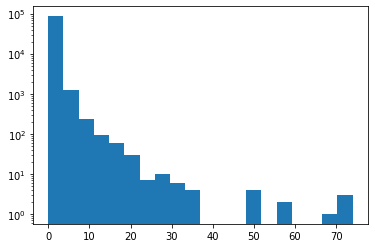

In [72]:
plt.hist(distribute,log=True, bins=20)